In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Load your cleaned dataset
df = pd.read_csv("cleaned_hotstar_data.csv")

In [3]:
# Ensure datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [4]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021.0,11.0
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Unknown,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021.0,11.0
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021.0,11.0
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Unknown,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021.0,11.0
4,s5,TV Show,The Beatles: Get Back,Unknown,"John Lennon, Paul McCartney, George Harrison, ...",Unknown,2021-11-25,2021,Unknown,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,2021.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2021-06-04,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,2021.0,6.0
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2021-04-02,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,2021.0,4.0
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2020-12-18,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",2020.0,12.0
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",2020-09-18,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,2020.0,9.0


In [6]:
sns.set(style="whitegrid")

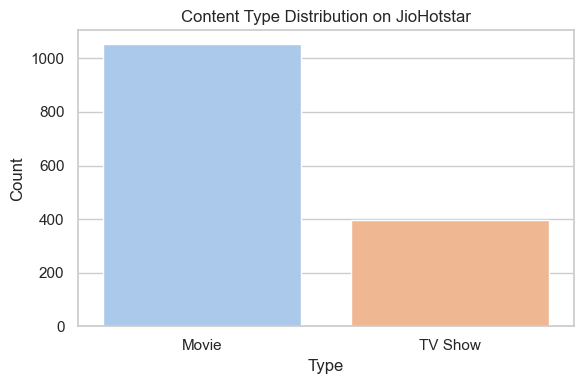

In [7]:
# 1. Content Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette="pastel")
plt.title("Content Type Distribution on JioHotstar")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

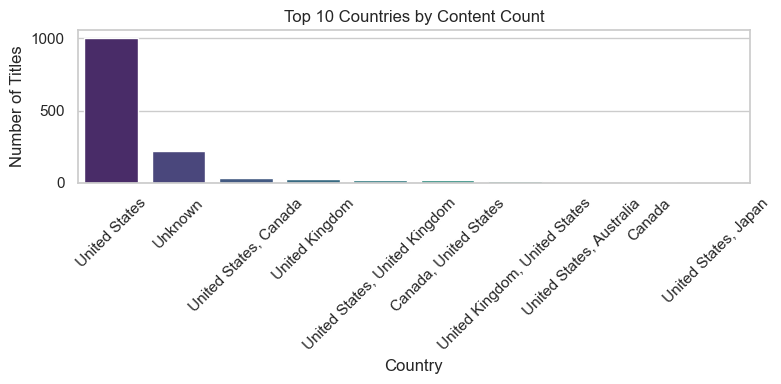

In [8]:
# 2. Top 10 Countries with Most Content
top_countries = df['country'].value_counts().nlargest(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title("Top 10 Countries by Content Count")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

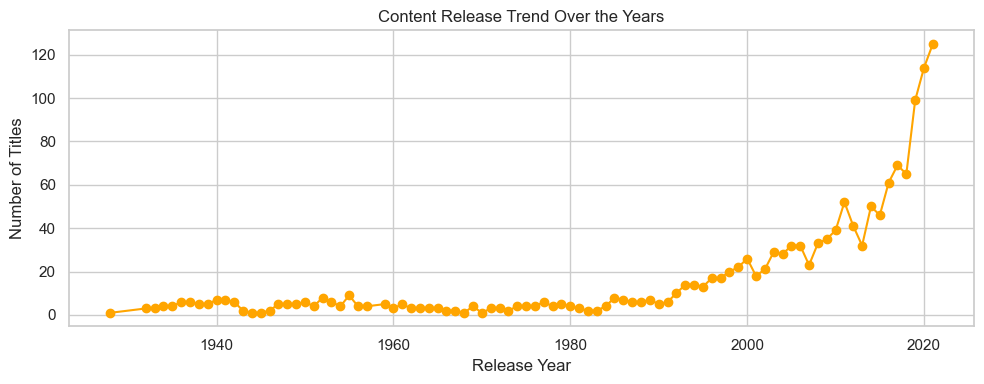

In [9]:
# 3. Content Release Trend Over the Years
release_trend = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,4))
release_trend.plot(kind='line', marker='o', color='orange')
plt.title("Content Release Trend Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()

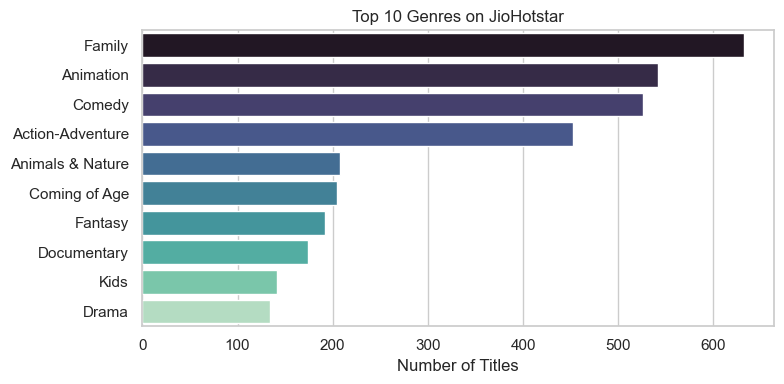

In [10]:
# 4. Genre Distribution (Top 10)
genre_counter = Counter()
for genres in df['listed_in']:
    genre_counter.update([genre.strip() for genre in genres.split(",")])
top_genres = dict(genre_counter.most_common(10))
plt.figure(figsize=(8,4))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette="mako")
plt.title("Top 10 Genres on JioHotstar")
plt.xlabel("Number of Titles")
plt.tight_layout()
plt.show()

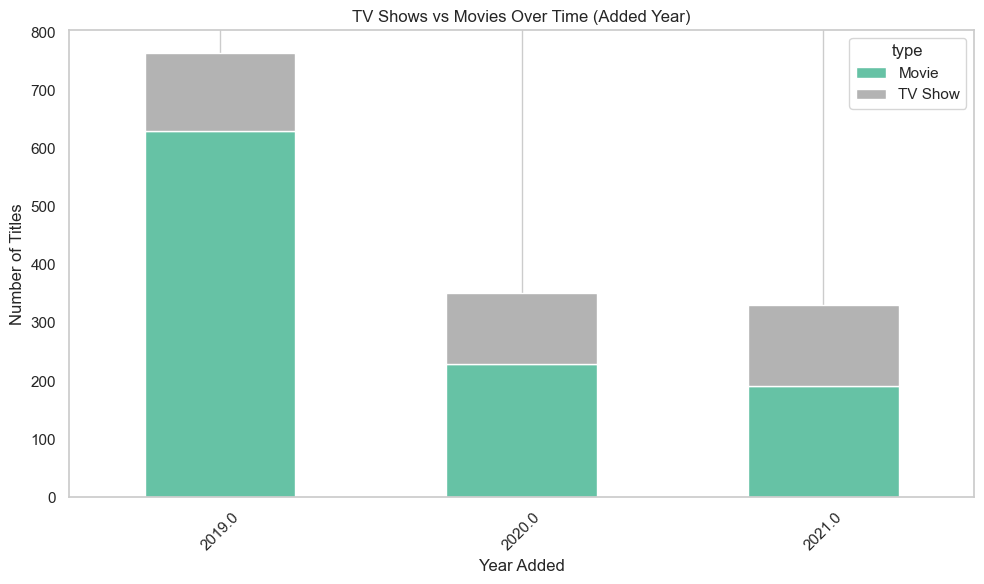

In [11]:
# 5. TV vs Movie Trends Over Years (year_added)
trend_data = df[df['year_added'].notnull()].groupby(['year_added', 'type']).size().unstack().fillna(0)
trend_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="Set2")
plt.title("TV Shows vs Movies Over Time (Added Year)")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

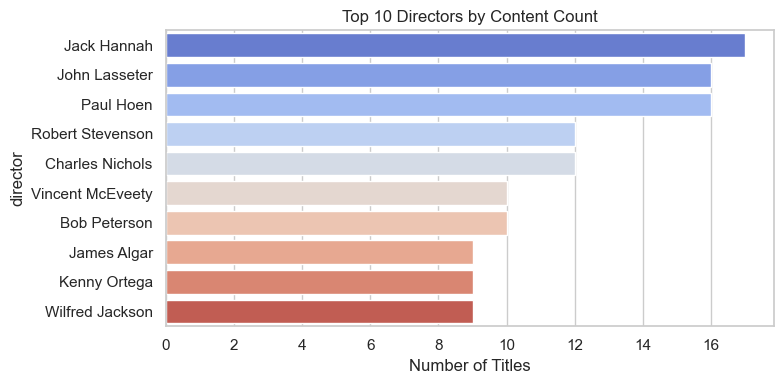

In [12]:
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")
plt.title("Top 10 Directors by Content Count")
plt.xlabel("Number of Titles")
plt.tight_layout()
plt.show()


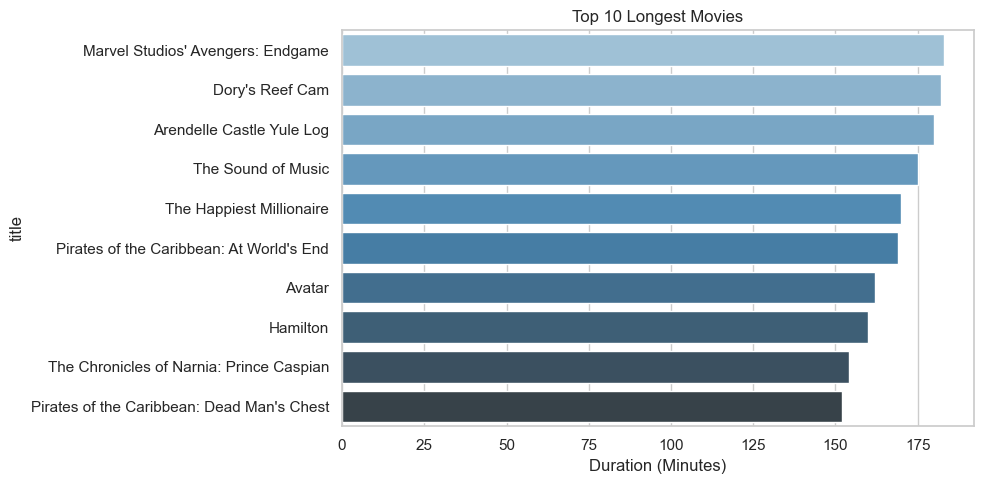

In [13]:
# Filter for Movies and extract duration in minutes
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.extract(r'(\d+)').astype(float)

top_long_movies = movies_df.sort_values(by='duration_minutes', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='duration_minutes', y='title', data=top_long_movies, palette='Blues_d')
plt.title("Top 10 Longest Movies")
plt.xlabel("Duration (Minutes)")
plt.tight_layout()
plt.show()


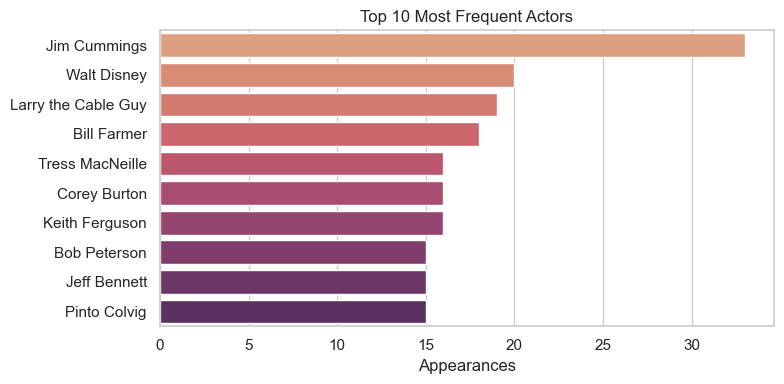

In [14]:
from collections import Counter

actor_counter = Counter()
for cast in df['cast']:
    if cast != "Unknown":
        actor_counter.update([x.strip() for x in cast.split(",")])

top_actors = dict(actor_counter.most_common(10))
plt.figure(figsize=(8,4))
sns.barplot(x=list(top_actors.values()), y=list(top_actors.keys()), palette="flare")
plt.title("Top 10 Most Frequent Actors")
plt.xlabel("Appearances")
plt.tight_layout()
plt.show()


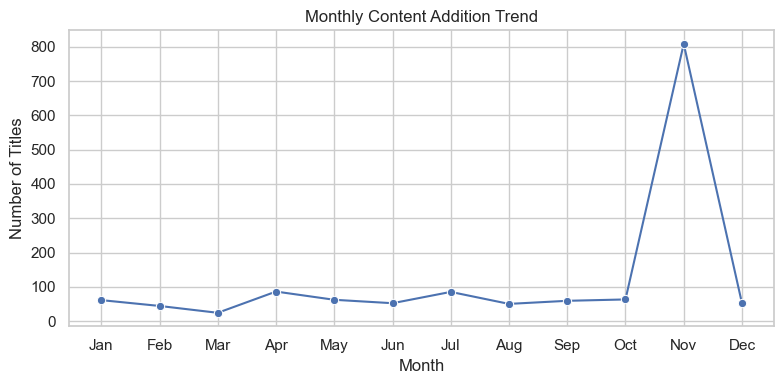

In [15]:
monthly_content = df[df['month_added'].notnull()].groupby('month_added').size()
plt.figure(figsize=(8,4))
sns.lineplot(x=monthly_content.index, y=monthly_content.values, marker="o")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Monthly Content Addition Trend")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()


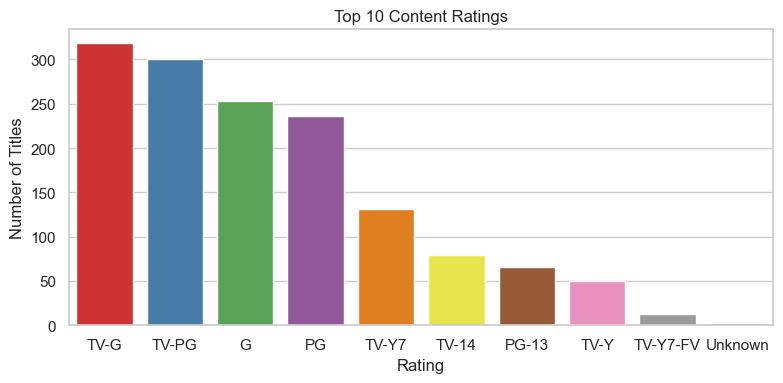

In [16]:
top_ratings = df['rating'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette="Set1")
plt.title("Top 10 Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()


                                              Review  Polarity Sentiment
0  I love this show! The story and acting are ama...  0.408333  Positive
1            Pretty average. Could have been better.  0.200000  Positive
2                   Worst movie ever. Waste of time. -0.600000  Negative
3           Great concept and visuals, I enjoyed it.  0.650000  Positive
4                Not worth watching. Poor direction. -0.275000  Negative
5                  Absolutely fantastic! Must watch.  0.500000  Positive
6                            Boring and predictable. -0.600000  Negative
7              Solid entertainment. Family loved it.  0.350000  Positive
8        Disappointing plot, but decent performance. -0.216667  Negative
9         One of the best shows I've seen this year!  1.000000  Positive


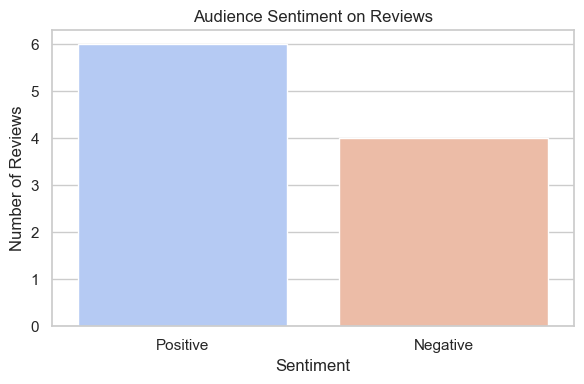

In [22]:
# Mock user review dataset (you can replace this with scraped data)
from textblob import TextBlob
reviews = [
    "I love this show! The story and acting are amazing.",
    "Pretty average. Could have been better.",
    "Worst movie ever. Waste of time.",
    "Great concept and visuals, I enjoyed it.",
    "Not worth watching. Poor direction.",
    "Absolutely fantastic! Must watch.",
    "Boring and predictable.",
    "Solid entertainment. Family loved it.",
    "Disappointing plot, but decent performance.",
    "One of the best shows I've seen this year!"
]

# Sentiment analysis using TextBlob
sentiments = [TextBlob(review).sentiment.polarity for review in reviews]

# Create DataFrame
sentiment_df = pd.DataFrame({
    'Review': reviews,
    'Polarity': sentiments
})
sentiment_df['Sentiment'] = sentiment_df['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Show sentiment summary
print(sentiment_df)

# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=sentiment_df, x='Sentiment', palette='coolwarm')
plt.title("Audience Sentiment on Reviews")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

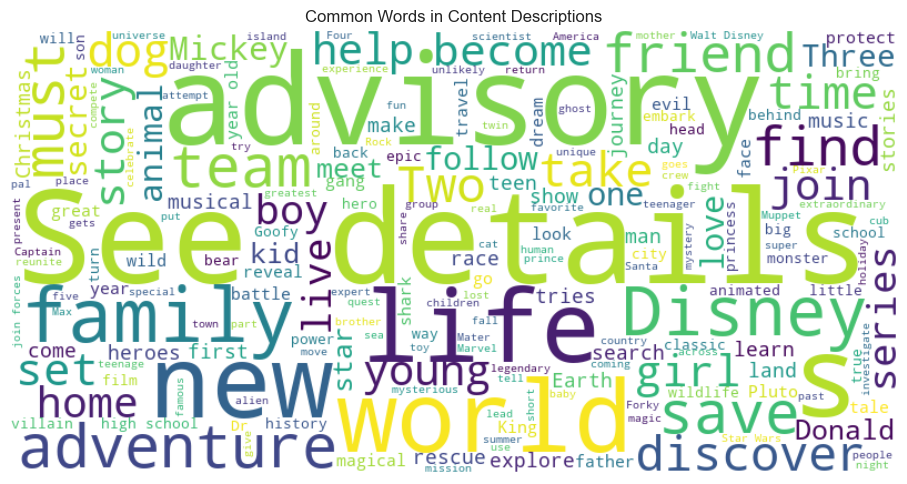

In [19]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(desc for desc in df['description'].astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Content Descriptions")
plt.tight_layout()
plt.show()